# 05.2 Trends, Smoothing, and Filtering

Understanding the temporal evolution of a time series can provide you with insights about where the data might go next. For that you must understand the trends your data is having. A trend analysis is simply a way to see where you have been to try to understand where you are going.

In some ocasions, you might want to present your findings, or remove undesired pieces of data. Remember, you might present you findings to someone without a data analysis background and you might need to adapt your plots

---

Trend analysis is usually much more complicated.
There is a notebook in the examples directory with the [Covid Analysis](../Examples/03-CovidCasesPortugal.ipynb).

---
## Smoothing

When you plot too much data, you might introduce graphical artefacts on the visualization.

Smoothing may help you represent data in a better fashion. However, smoothing techniques have their drawbacks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
temp_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

dtemp = pd.read_csv(temp_file)

In [3]:
dtemp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
dtemp.plot(x='Date') ## Again, look at the unformatted x-axis

In [4]:
dtemp.dtypes

Date     object
Temp    float64
dtype: object

In [5]:
temp_series = dtemp.set_index('Date')
temp_series.index = pd.to_datetime(temp_series.index)

In [ ]:
temp_series.head()

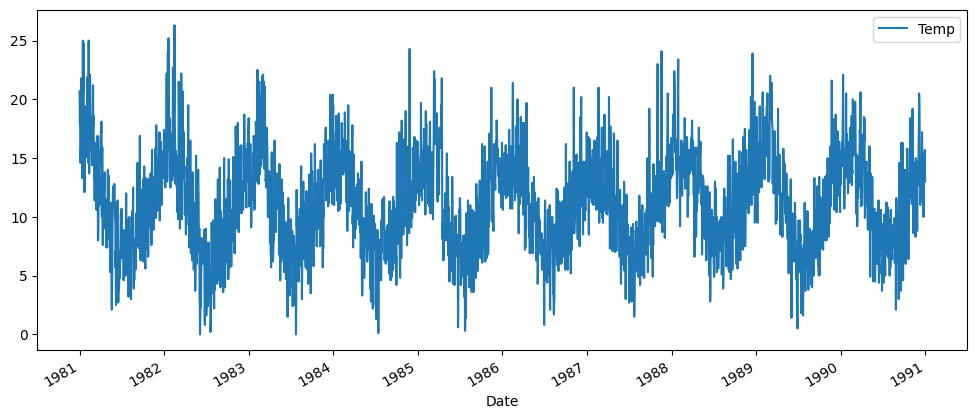

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
temp_series.plot(ax=ax)
plt.show()

The bread and butter of a data analyst is the rolling average. This is good for when we have plenty of points like in this case. Use only with a window that is comparatively small compared with the total number of points.

Although for a simple analysis the rolling average is fine, it may give a wrong insight due to a poorly chosen window size.

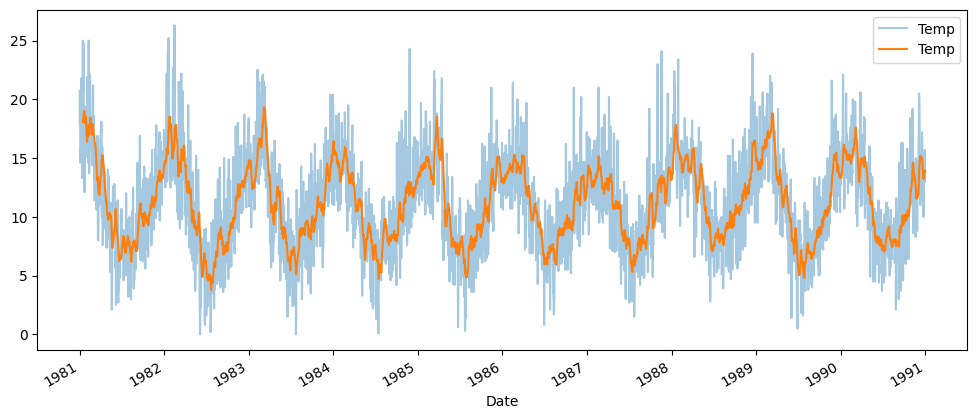

In [11]:
fig, ax = plt.subplots(figsize=(12,5))

temp_series.plot(ax=ax, alpha=0.4)

pts_avg = 15 #100 #200
temp_series.rolling(pts_avg).mean().plot(ax=ax)
plt.show()

An alternative that might be better on ocasion is using a median filter instead of a rolling average. The median filter usually is best at filtering out outliers. It is widely used in photography to [remove moving objects from the desired background](https://medium.com/@nikolasmoya/simple-algorithm-to-remove-moving-objects-from-pictures-cdd3396c68e0). It also adds delays to your smoothed output.

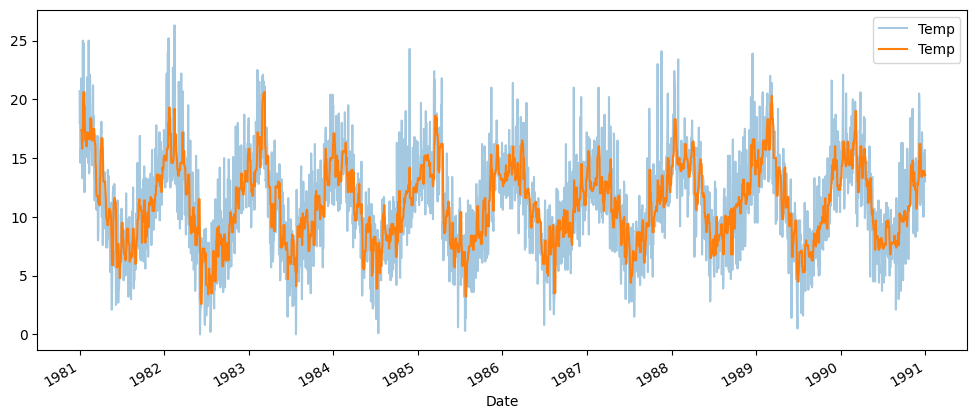

In [15]:
fig, ax = plt.subplots(figsize=(12,5))

temp_series.plot(ax=ax, alpha=0.4)

pts_avg = 9 # 39 # 79
temp_series.rolling(pts_avg).median().plot(ax=ax)
plt.show()

The median filter is best used when you have a ground truth and a few points that "escape" your definition of "good data". Remember that the definition of outlier is in the eye of the beholder.

#### Intermission: a brief word about outliers

What's the outlier in the next sequence?

In [16]:
a = [0, 1, 2, 0, 300, 2]
print(a)

[0, 1, 2, 0, 300, 2]


And in the next one?

In [19]:
npts = 30000

x = np.linspace(0, 90, npts)
y = np.sin(x)
y[200] = 3.0
y[600] = -4.0

print(y)

[0.         0.0030001  0.00600016 ... 0.89666909 0.8953369  0.89399666]


And in the next example?

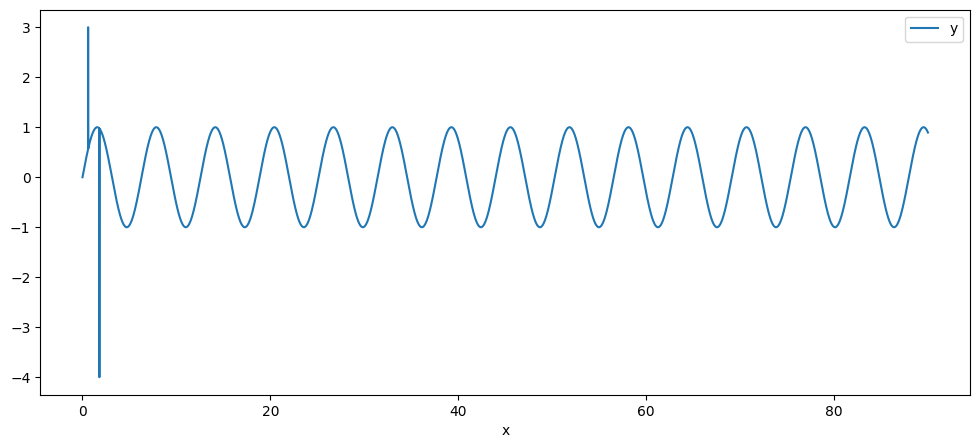

In [20]:
dfmed = pd.DataFrame({'x':x, 'y':y})

dfmed.plot(x='x', y='y', figsize=(12,5))
plt.show()

#### Remember: defining an outlier is hard.
The median filter, in this case, can clearly filter out the outliers.

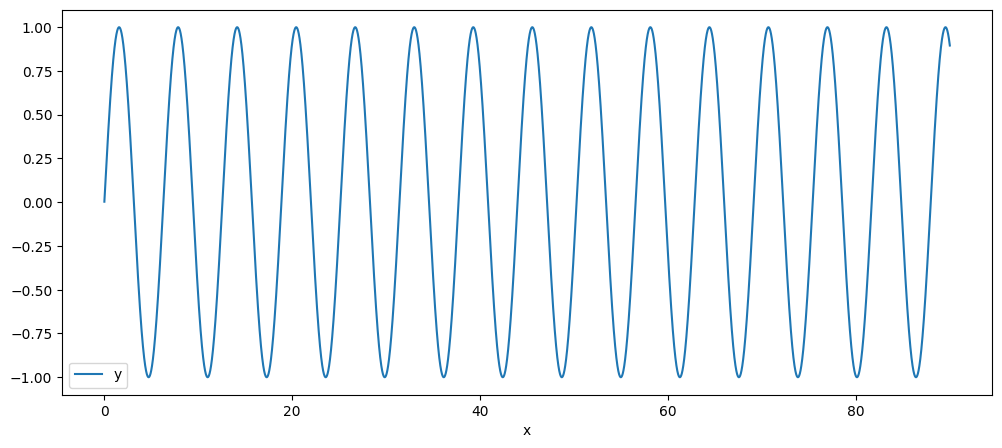

In [21]:
dfmed_series = dfmed.set_index('x')
dfmed_series.rolling(3).median().plot(figsize=(12,5))
plt.show()

---

Let's take an in-depth look at [seasonality and trend](05.3-SeasonalityTrend.ipynb).